# Input

In [1]:
import numpy as np
from functions_remix_hydro import *
from remix_hydro import new_remix_hydro

In [2]:
N = 10

In [3]:
empilement_random = [np.sort(np.random.randint(low=0,high=100,size=(T,3)),axis=1) for i in range(N)]

In [4]:
bornes_p = [np.sort(np.random.randint(low=0,high=50,size=(T,2)),axis=1) for i in range(N)]
for i in range(N):
    bornes_p[i][:,0] = np.minimum(bornes_p[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0])
    bornes_p[i][:,1] = np.maximum(bornes_p[i][:,1],empilement_random[i][:,1]-empilement_random[i][:,0])

In [5]:
inflow = [np.random.randint(low=0,high=50,size=(T)) for i in range(N)]

In [6]:
level_stock = [np.concatenate([np.array([0]),np.cumsum(inflow[i]-(empilement_random[i][:,1]-empilement_random[i][:,0]))]) for i in range(N)]
level_stock = [level_stock[i]-np.min(level_stock[i]) for i in range(N)]
capa_stock = [1.2*np.max(level_stock[i]) for i in range(N)]
level_stock = [level_stock[i]+0.1*capa_stock[i] for i in range(N)]

In [7]:
net_position = [np.array([np.random.randint(low=-empilement_random[i][j,0],high=empilement_random[i][j,0]+1)if empilement_random[i][j,0]>0 else 0 for j in range(T) ])for i in range(N)]

# Original algorithm

In [8]:
remix_hydro_original = [orignal_algorithm(empilement_random[i][:,0],empilement_random[i][:,1] - empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1]) for i in range(N)]

85 0.00152587890625 50.071319580078125 50.07427978515625
86 0.001953125 55.142578125 55.1484375
85 0.009185791015625 55.998687744140625 56.001708984375
85 0.00244140625 52.37469482421875 52.3775634765625
84 0.000274658203125 53.29997253417969 53.30145263671875
89 -0.0048828125 54.498046875 54.5458984375
88 -0.0048828125 53.81103515625 53.833740234375
84 -0.005340576171875 65.69122314453125 65.69271850585938
87 -0.00927734375 50.06640625 50.07763671875
88 0.0048828125 49.92822265625 49.9521484375


In [9]:
remix_hydro_simplified = [simplified_algorithm(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1]) for i in range(N)]

85 0.00152587890625 50.071319580078125 50.07427978515625
86 0.001953125 55.142578125 55.1484375
85 0.009185791015625 55.998687744140625 56.001708984375
85 0.00244140625 52.37469482421875 52.3775634765625
84 0.000274658203125 53.29997253417969 53.30145263671875
89 -0.0048828125 54.498046875 54.5458984375
88 -0.0048828125 53.81103515625 53.833740234375
84 -0.005340576171875 65.69122314453125 65.69271850585938
87 -0.00927734375 50.06640625 50.07763671875
88 0.0048828125 49.92822265625 49.9521484375


In [10]:
for i in range(N):
    for j in range(2):
        assert np.all(remix_hydro_original[i][j]==remix_hydro_simplified[i][j])

In [11]:
remix_hydro_with_p_min= [simplified_algorithm_with_p_min(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0]) for i in range(N)]

84 -0.004791259765625 46.5989990234375 46.60047912597656
86 0.001953125 52.142578125 52.1484375
84 0.0026092529296875 39.99971008300781 40.001220703125
86 -0.006591796875 43.995361328125 44.0010986328125
85 0.00701904296875 48.165496826171875 48.16845703125
85 -0.0045166015625 53.3974609375 53.40045166015625
87 0.0048828125 47.1243896484375 47.1357421875
84 0.0069580078125 64.49942016601562 64.50091552734375
86 0.00244140625 48.499755859375 48.50537109375
85 0.003173828125 49.33306884765625 49.3360595703125


In [12]:
# remix_hydro_with_p_min_and_capa = [simplified_algorithm_with_p_min_and_capa(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

# New heuristic

In [13]:
new_heur = [new_heuristic(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

965
976
974
983
961
967
960
963
960
961


In [14]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_original[i][j]-new_heur[i][j])<=0.01)

In [15]:
new_heur_with_p_min = [new_heuristic_with_p_min(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

964
978
977
985
978
971
976
972
966
961


In [16]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_with_p_min[i][j]-new_heur_with_p_min[i][j])<=0.01)

In [17]:
new_heur_with_p_min_and_capa_random = [new_heuristic_with_p_min_and_capa_random(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

734
700
685
0
39
488
821
578
0
553


In [8]:
def new_remix_hydro(
    G,
    H,
    D,
    P_max,
    P_min,
    initial_level,
    capa,
    inflow,
    overflow,
    pumping,
    spillage,
    dtg_mrg,
):
    new_H = np.array(H, copy=True, dtype=np.float64)
    new_D = np.array(D, copy=True, dtype=np.float64)

    loop = 1000

    G_plus_H = G + new_H

    level = initial_level + np.cumsum(inflow - overflow + pumping - new_H)

    # Prendre aussi en compte le pompage et l'overlfow (que l'on ne touche pas) dans le calcul des niveaux de stock

    eps = 1e-2

    top = max(G + H + D + 1)

    filter_hours_remix = (spillage + dtg_mrg == 0) * (H + D > 0)

    while loop > 0:

        tried_creux = np.zeros_like(H)

        delta = 0

        possible_creux = np.argwhere(
            (new_D > 0) * (new_H < P_max) * (tried_creux == 0) * filter_hours_remix
        )[:, 0]

        while len(possible_creux) > 0:
            idx_creux = np.argmin(
                np.where(
                    (new_D > 0)
                    * (new_H < P_max)
                    * (tried_creux == 0)
                    * filter_hours_remix,
                    G_plus_H,
                    top,
                )
            )

            tried_pic = np.zeros_like(H)

            possible_pic = np.argwhere(
                (new_H > P_min)
                * (G_plus_H >= G_plus_H[idx_creux] + eps)
                * (tried_pic == 0)
                * filter_hours_remix
            )[:, 0]

            while len(possible_pic) > 0:

                idx_pic = np.argmax(
                    np.where(
                        (new_H > P_min)
                        * (G_plus_H >= G_plus_H[idx_creux] + eps)
                        * (tried_pic == 0)
                        * filter_hours_remix,
                        G_plus_H,
                        0,
                    )
                )

                if idx_creux < idx_pic:
                    intermediate_level = level[idx_creux:idx_pic]
                    max_pic = capa
                    max_creux = min(intermediate_level)
                else:
                    intermediate_level = level[idx_pic:idx_creux]
                    max_pic = capa - max(intermediate_level)
                    max_creux = capa

                max_pic = min(new_H[idx_pic] - P_min[idx_pic], max_pic)
                max_creux = min(
                    P_max[idx_creux] - new_H[idx_creux], new_D[idx_creux], max_creux
                )

                dif_pic_creux = max(G_plus_H[idx_pic] - G_plus_H[idx_creux], 0)

                delta = max(min(max_pic, max_creux, dif_pic_creux / 2), 0)

                if delta > 0:

                    new_H[idx_pic] = new_H[idx_pic] - delta
                    new_H[idx_creux] = new_H[idx_creux] + delta
                    new_D[idx_pic] = H[idx_pic] + D[idx_pic] - new_H[idx_pic]
                    new_D[idx_creux] = H[idx_creux] + D[idx_creux] - new_H[idx_creux]
                    break

                else:
                    tried_pic[idx_pic] = 1
                    possible_pic = np.argwhere(
                        (new_H > P_min)
                        * (G_plus_H >= G_plus_H[idx_creux] + eps)
                        * (tried_pic == 0)
                        * filter_hours_remix
                    )[:, 0]

            if delta > 0:
                break

            else:
                tried_creux[idx_creux] = 1
                possible_creux = np.argwhere(
                    (new_D > 0)
                    * (new_H < P_max)
                    * (tried_creux == 0)
                    * filter_hours_remix
                )[:, 0]

        loop -= 1

        G_plus_H = G + new_H

        level = initial_level + np.cumsum(inflow - overflow + pumping - new_H)

        if delta == 0:
            break

    return new_H, new_D, level

In [ ]:
avec_imports =[]
for i in range(N):
    print(i)
    avec_imports.append(new_remix_hydro(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]))

0
964
1
977
2
968
3
968
4
973
5
967
6
975
7
971
8
914
9
960


In [ ]:
for i in range(N):
    level = np.concatenate(
        [np.array([level_stock[i][0]]), level_stock[i][0] + np.cumsum(inflow[i] - avec_imports[i][0])]
    )
    if np.all(level>0)&np.all(level<capa_stock[i]):
        assert np.all(np.abs(avec_imports[i][0]-new_heur_with_p_min[i][0])<=0.02)

# Plot

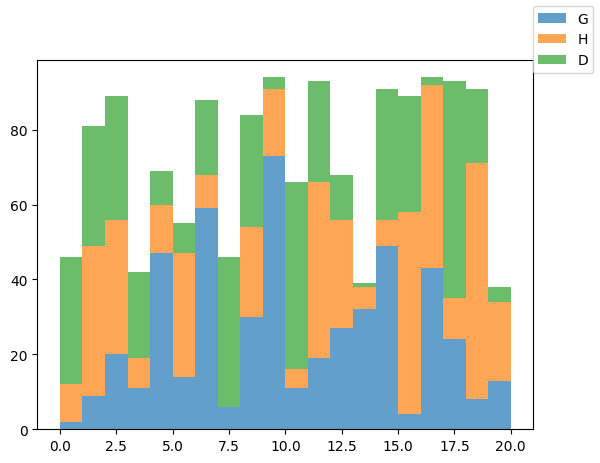

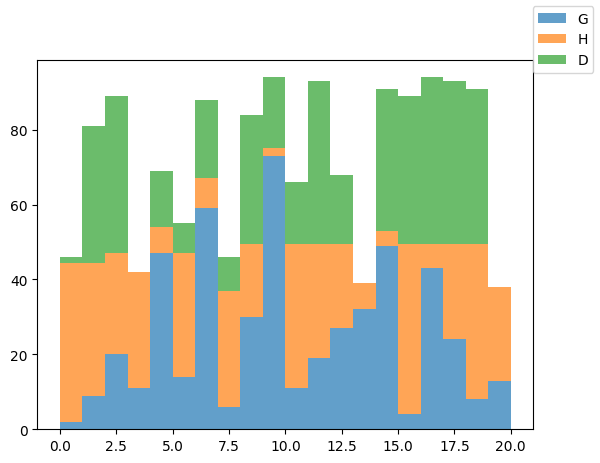

In [ ]:
i = 8
plot_empilement(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1])
# plot_empilement(empilement_random[i][:,0],remix_hydro_original[i][0],remix_hydro_original[i][1])
# plot_empilement(empilement_random[i][:,0],new_heur_with_p_min[i][0],new_heur_with_p_min[i][1])
plot_empilement(empilement_random[i][:,0],avec_imports[i][0],avec_imports[i][1])

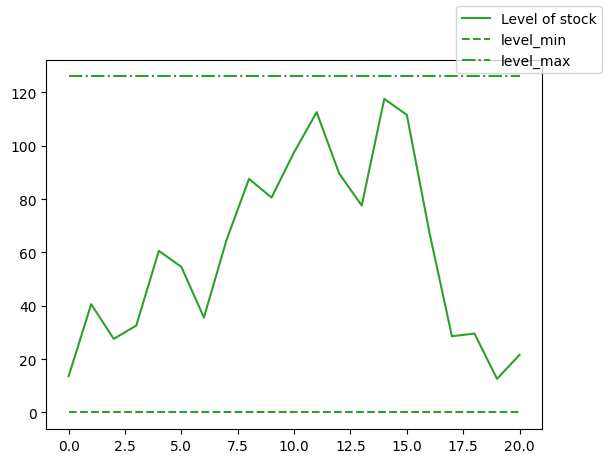

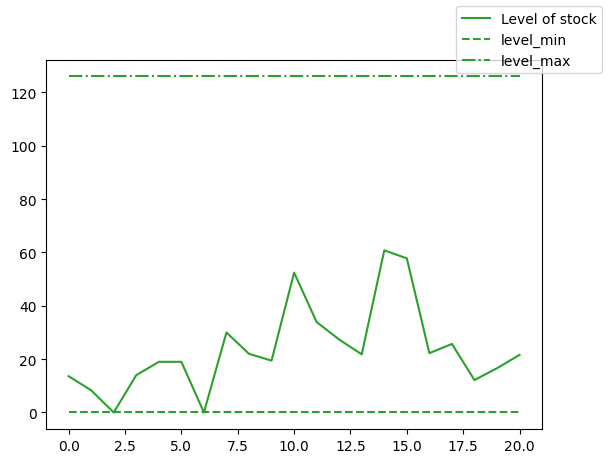

In [ ]:
plot_level(level_stock[i][0],capa_stock[i],empilement_random[i][:,1]-empilement_random[i][:,0],inflow[i])
# plot_level(level_stock[i][0],capa_stock[i],remix_hydro_original[i][0],inflow[i])
# plot_level(level_stock[i][0],capa_stock[i],new_heur_with_p_min[i][0],inflow[i])
plot_level(level_stock[i][0],capa_stock[i],avec_imports[i][0],inflow[i])

In [69]:
print("L = ", list_to_print(empilement_random[i][:,2]))
print("H = ", list_to_print(empilement_random[i][:,1]-empilement_random[i][:,0]))
print("D = ", list_to_print(empilement_random[i][:,2]-empilement_random[i][:,1]))
# print("p_max = ",list_to_print(bornes_p[i][:,1]))
# print("min_gen = ",list_to_print(bornes_p[i][:,0]))
print("initial_level = ",round(level_stock[i][0],10))
print("capa_stock = ",capa_stock[i])
print("inflow = ",list_to_print( inflow[i]))
# print("new_H = ",list_to_print(avec_imports[i][0]))
# print("new_D = ",list_to_print( avec_imports[i][1]))
print("net_position = ",list_to_print( net_position[i]))

L =  [91, 43, 38, 79, 70, 33, 54, 82, 58, 75]
H =  [78, 10, 30, 57, 31, 5, 19, 13, 28, 45]
D =  [10, 6, 1, 22, 28, 27, 4, 40, 8, 25]
initial_level =  145.6
capa_stock =  156.0
inflow =  [15, 28, 12, 3, 18, 29, 46, 29, 0, 7]
net_position =  [-1, -21, 6, 0, 2, -1, 16, -18, -12, -1]


# Plan de test

In [2]:
L = [46, 81, 89, 42, 69, 55, 88, 46, 84, 94, 66, 93, 68, 39, 91, 89, 94, 93, 91, 38]

H = [10, 40, 36, 8, 13, 33, 9, 0, 24, 18, 5, 47, 29, 6, 7, 54, 49, 11, 63, 21]

D = [34, 32, 33, 23, 9, 8, 20, 40, 30, 3, 50, 27, 12, 1, 35, 31, 2, 58, 20, 4]

p_max = [43, 48, 36, 43, 13, 44, 13, 31, 49, 35, 47, 47, 37, 41, 21, 54, 49, 28, 63, 49]

min_gen = [10, 22, 17, 8, 7, 15, 8, 0, 9, 2, 5, 18, 22, 6, 4, 11, 1, 0, 23, 6]

initial_level = 13.6

capa_stock = 126.0

inflow = [37, 27, 41, 36, 7, 14, 38, 23, 17, 35, 20, 24, 17, 46, 1, 10, 10, 12, 46, 30] 

In [3]:
new_H, new_D, _ = new_remix_hydro(np.array(L)-np.array(H)-np.array(D),np.array(H),np.array(D),np.array(p_max),np.array(min_gen),initial_level,capa_stock,np.array(inflow),np.zeros_like(L),np.zeros_like(L),np.zeros_like(L),np.zeros_like(L))

In [4]:
list_to_print(new_H)

'[42.3, 35.3, 27.0, 31.0, 7.0, 33.0, 8.0, 31.0, 19.55, 2.0, 38.55, 30.55, 22.55, 7.0, 4.0, 45.55, 6.55, 25.55, 41.55, 25.0]'

In [5]:
list_to_print(new_D)

'[1.7, 36.7, 42.0, 0.0, 15.0, 8.0, 21.0, 9.0, 34.45, 19.0, 16.45, 43.45, 18.45, 0.0, 38.0, 39.45, 44.45, 43.45, 41.45, 0.0]'

In [6]:
len(L)

20

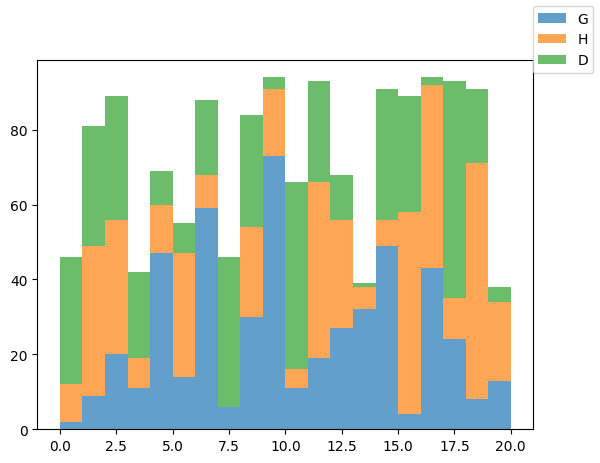

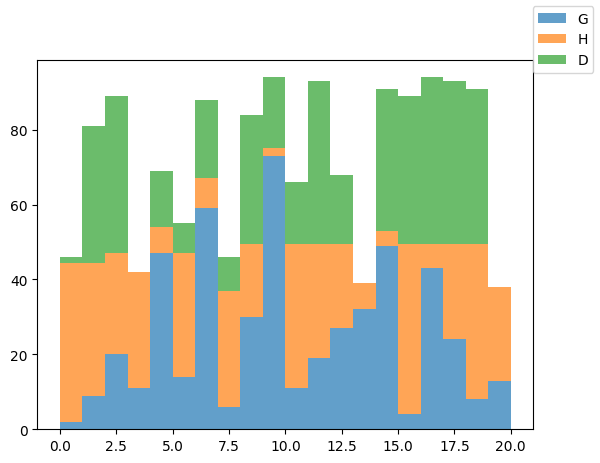

In [7]:
plot_empilement(np.array(L)-np.array(H)-np.array(D),np.array(H),np.array(D))
plot_empilement(np.array(L)-np.array(H)-np.array(D),new_H,new_D)

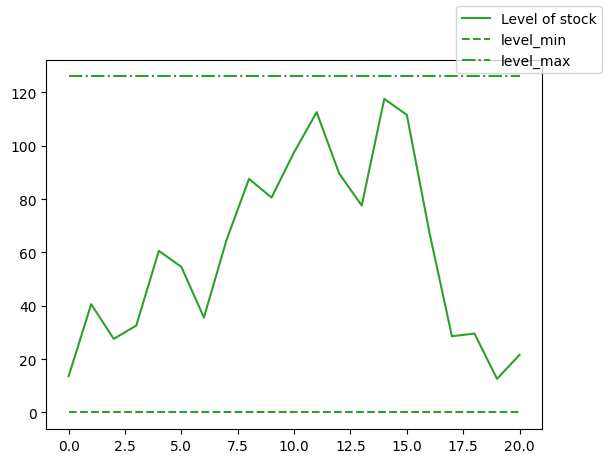

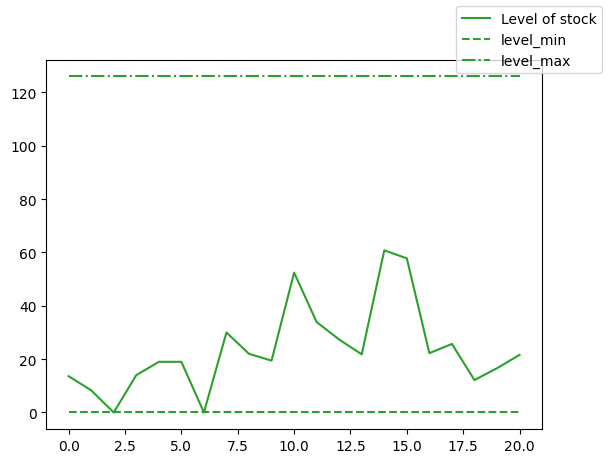

In [8]:
plot_level(initial_level,capa_stock,np.array(H),np.array(inflow))
plot_level(initial_level,capa_stock,np.array(new_H),np.array(inflow))

# Optim

In [21]:
optim = [optimization_problem(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

FICO Xpress v8.14.8, Hyper, solve started 12:29:44, Dec 3, 2024
Heap usage: 762KB (peak 762KB, 642KB system)
Minimizing MILP noname using up to 8 threads and up to 31GB memory, with these control settings:
OUTPUTLOG = 1
MIPRELSTOP = 1.e-10
Original problem has:
      1009 rows          841 cols         2688 elements       504 globals
Presolved problem has:
       672 rows          504 cols         1845 elements       335 globals
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1000KB (peak 1345KB, 642KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.01e-02,  9.90e+01] / [ 2.00e-01,  4.81e+00]
  RHS and bounds [min,max] : [10.00e-01,  4.16e+03] / [ 6.96e-01,  5.20e+02]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 8.00e+00,  8.00e+00]
Autoscaling applied Curtis-Reid scaling

Symmetric problem: generators: 7, support set: 26
 Number of orbits: 19, largest orbit: 2
 Row orbits: 25, row supp

In [22]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_original[i][j]-optim[i][j])<=1e-3)

In [23]:
optim_p_min = [optimization_problem_p_min(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]) for i in range(N)]

FICO Xpress v8.14.8, Hyper, solve started 12:29:45, Dec 3, 2024
Heap usage: 762KB (peak 762KB, 666KB system)
Minimizing MILP noname using up to 8 threads and up to 31GB memory, with these control settings:
OUTPUTLOG = 1
MIPRELSTOP = 1.e-10
Original problem has:
      1009 rows          841 cols         2688 elements       504 globals
Presolved problem has:
       673 rows          505 cols         1848 elements       336 globals
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1000KB (peak 1345KB, 666KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.01e-02,  9.90e+01] / [ 2.35e-01,  5.38e+00]
  RHS and bounds [min,max] : [ 1.79e-02,  4.16e+03] / [ 3.57e-02,  5.20e+02]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 8.00e+00,  8.00e+00]
Autoscaling applied Curtis-Reid scaling

Symmetric problem: generators: 1, support set: 4
 Number of orbits: 3, largest orbit: 2
 Row orbits: 4, row support

In [24]:
for i in range(N):
    for j in range(2):
        assert np.all(np.abs(remix_hydro_with_p_min[i][j]-optim_p_min[i][j])<=1e-2)

In [ ]:
optim_p_min_and_capa = []
for i in range(100):
    print(i,end='/r')
    optim_p_min_and_capa.append(optimization_problem_p_min_and_capa(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],bornes_p[i][:,1],bornes_p[i][:,0],level_stock[i][0],capa_stock[i], inflow[i]))

FICO Xpress v8.14.8, Hyper, solve started 12:29:46, Dec 3, 2024
Heap usage: 910KB (peak 1043KB, 689KB system)
Minimizing MILP noname using up to 8 threads and up to 31GB memory, with these control settings:
OUTPUTLOG = 1
MIPRELSTOP = 1.e-10
Original problem has:
      1178 rows         1010 cols         3193 elements       504 globals
Presolved problem has:
       678 rows          510 cols         2209 elements       336 globals
LP relaxation tightened
Presolve finished in 0 seconds
Heap usage: 1223KB (peak 1867KB, 689KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.01e-02,  9.90e+01] / [ 1.41e-02,  1.97e+00]
  RHS and bounds [min,max] : [ 1.79e-02,  4.16e+03] / [ 1.79e-02,  6.07e+02]
  Objective      [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
Autoscaling applied standard scaling

Will try to keep branch and bound tree memory usage below 24.9GB
Starting concurrent solve with dual (1 thread)

 Con

IndexError: list index out of range

In [ ]:
i = 1
# plot_empilement(empilement_random[i][:,0],remix_hydro_original[i][0],remix_hydro_original[i][1])
plot_empilement(empilement_random[i][:,0],optim[i][0],optim[i][1])
plot_empilement(empilement_random[i][:,0],optim_p_min[i][0],optim_p_min[i][1])
plot_empilement(empilement_random[i][:,0],optim_p_min_and_capa[i][0],optim_p_min_and_capa[i][1])

In [ ]:
# plot_level(level_stock[i][0],capa_stock[i],empilement_random[i][:,1]-empilement_random[i][:,0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],optim[i][0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],optim_p_min[i][0],inflow[i],bornes_p[i])
plot_level(level_stock[i][0],capa_stock[i],optim_p_min_and_capa[i][0],inflow[i],bornes_p[i])
# plot_level(level_stock[i][0],capa_stock[i],new_heur_with_p_min_and_capa[i][0],inflow[i],bornes_p[i])

# Cas test

In [9]:
with open("D:/Users/gerbauxjul/Documents/6-Etudes Antares/OneNodeBase_remix_hydro/output/20241203-1544eco-export_mps/economy/mc-ind/00001/areas/area/values-hourly.txt","r") as file:
    output_antares = [
                line.strip().split("\t")
                for line in file.readlines()[
                    168 * 0 + 7 : 168 * 0 + 7 + 168
                ]
            ]
load = np.array([float(line[7]) for line in output_antares])
H = np.array([float(line[11]) for line in output_antares])
D = np.array([float(line[16]) for line in output_antares])
inflow = np.array([float(line[14]) for line in output_antares])
ovf = np.array([float(line[15]) for line in output_antares])
G = load-H-D

In [12]:
print("G = ",list_to_print(G))
print("H = ",list_to_print(H))
print("D = ",list_to_print(D))
print("inflow = ",list_to_print(inflow))
print("overflow = ",list_to_print(ovf))

G =  [37040.0, 42837.0, 49172.0, 47479.0, 45795.0, 56868.0, 51093.0, 51735.0, 48828.0, 49362.0, 53020.0, 45663.0, 48048.0, 58604.0, 53813.0, 48531.0, 62500.0, 60337.0, 55894.0, 44798.0, 50042.0, 44511.0, 47163.0, 47274.0, 44413.0, 47258.0, 52105.0, 43623.0, 47872.0, 46070.0, 48922.0, 54454.0, 53810.0, 56321.0, 60094.0, 50471.0, 44998.0, 43960.0, 51430.0, 57296.0, 47169.0, 48090.0, 44424.0, 51193.0, 47439.0, 41711.0, 54168.0, 49645.0, 51593.0, 46417.0, 47720.0, 41711.0, 50319.0, 57942.0, 61349.0, 60927.0, 62420.0, 59657.0, 56045.0, 56378.0, 48113.0, 55862.0, 53730.0, 59706.0, 62500.0, 55555.0, 42304.0, 43467.0, 44944.0, 48115.0, 48036.0, 44074.0, 41148.0, 41193.0, 45060.0, 37939.0, 42124.0, 47462.0, 42544.0, 40130.0, 48319.0, 52030.0, 53970.0, 50266.0, 50236.0, 43557.0, 44623.0, 49455.0, 55002.0, 59235.0, 51315.0, 44547.0, 54257.0, 53323.0, 45085.0, 45044.0, 44306.0, 50187.0, 42321.0, 43908.0, 47671.0, 57173.0, 56130.0, 58693.0, 60358.0, 56232.0, 48450.0, 52298.0, 55454.0, 56045.0, 6250

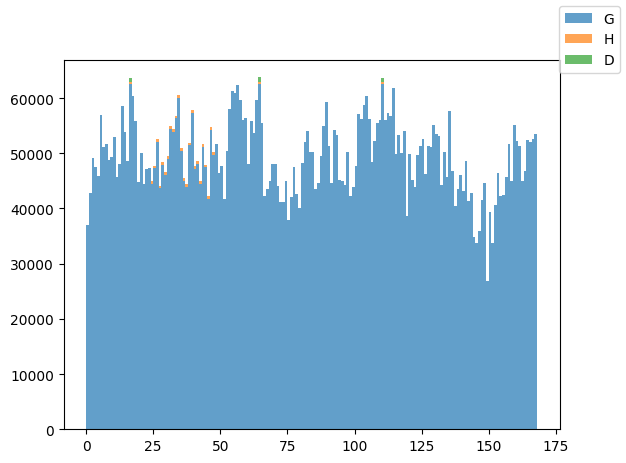

In [117]:
plot_empilement(G,H,D)

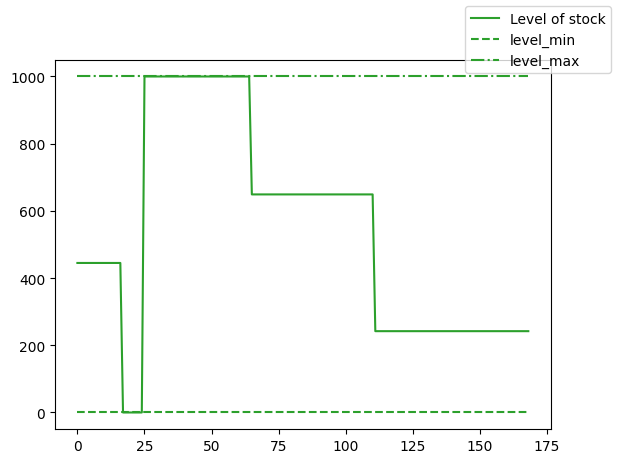

In [118]:
plot_level(1000*0.445,1000,H,inflow-ovf)

In [119]:
for idx in np.argwhere(D>0):
    print(G[idx]+H[idx])

[62945.]
[62851.]
[62907.]


In [120]:
HE_original, DE_original = new_heuristic(G,H,D,np.ones(168)*500,np.zeros(168),1000*0.445,1000, inflow-ovf)

989


In [121]:
for idx in np.argwhere(D>0):
    print(G[idx]+HE_original[idx])

[62900.99707031]
[62900.99707031]
[62901.00585938]


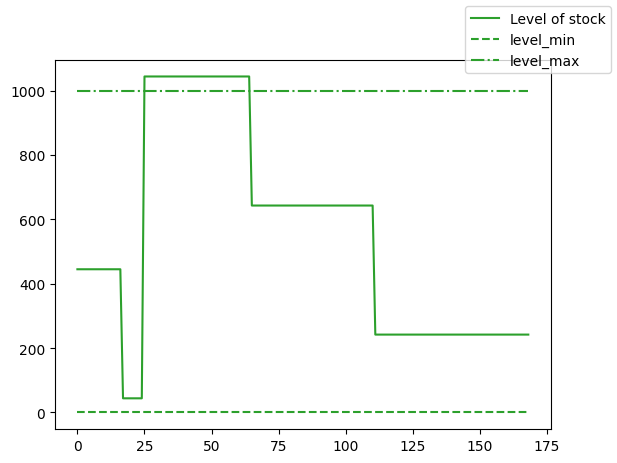

In [122]:
plot_level(1000*0.445,1000,HE_original,inflow-ovf)

In [14]:
HE, DE,_ = new_remix_hydro(G,H,D,np.ones(168)*500,np.zeros(168),1000*0.445,1000, inflow,ovf,np.zeros(168),np.zeros(168),np.zeros(168))

In [15]:
print("new_H = ",list_to_print(HE))
print("new_D = ",list_to_print(DE))

new_H =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 445.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 500.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 379.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 379.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
new_D =  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 713.0,

In [124]:
for idx in np.argwhere(D>0):
    print(G[idx]+HE[idx])

[62945.]
[62879.]
[62879.]


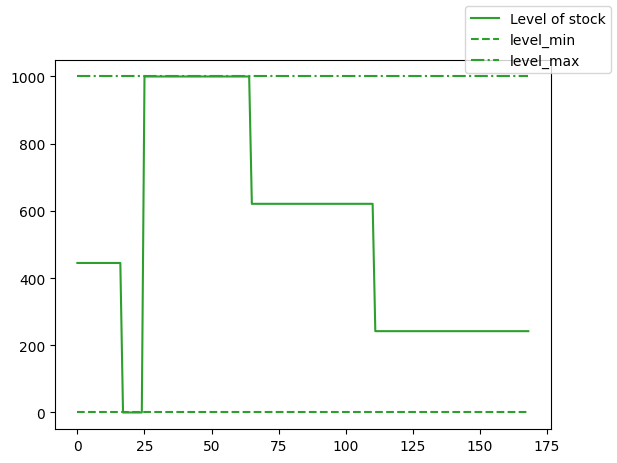

In [125]:
plot_level(1000*0.445,1000,HE,inflow-ovf)

In [126]:
np.where(ovf>0)

(array([24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
        41, 42, 43, 44, 45, 46, 47], dtype=int64),)

In [165]:
model = xp.problem()
model.read("D:/Users/gerbauxjul/Documents/6-Etudes Antares/OneNodeBase_remix_hydro/output/20241203-1544eco-export_mps/problem-1-1--optim-nb-2.mps")


Reading Problem Pb Solve
Problem Statistics
         505 (      1 spare) rows
        1344 (      0 spare) structural columns
        2855 (   1344 spare) non-zero elements
Global Statistics
           0 entities        0 sets        0 set members


In [166]:
vars = model.getVariable()

In [167]:
for i in range(1,T):
    prod_i_1 = [v for v in vars if (f"hour<{i-1}>" in v.name) and ("Prod" in v.name)]
    prod_i = [v for v in vars if (f"hour<{i}>" in v.name) and ("Prod" in v.name)]
    abs_var = xp.var(lb=0)
    model.addVariable(abs_var)
    model.addConstraint(xp.Sum(prod_i_1)-xp.Sum(prod_i)<=abs_var)
    model.addConstraint(xp.Sum(prod_i)-xp.Sum(prod_i_1)<=abs_var)
    model.chgobj([abs_var],[1e-1])

In [168]:
model.solve()
print(model.getProbStatusString())

FICO Xpress v8.14.8, Hyper, solve started 17:15:13, Dec 3, 2024
Heap usage: 1250KB (peak 1250KB, 989KB system)
Minimizing LP Pb Solve using up to 8 threads and up to 31GB memory, with these control settings:
OUTPUTLOG = 1
MIPRELSTOP = 1.e-10
Original problem has:
       839 rows         1511 cols         5861 elements
Presolved problem has:
       691 rows         1138 cols         4646 elements
Presolve finished in 0 seconds
Heap usage: 1288KB (peak 2232KB, 989KB system)

Coefficient range                    original                 solved        
  Coefficients   [min,max] : [ 1.00e+00,  1.00e+00] / [ 1.00e+00,  1.00e+00]
  RHS and bounds [min,max] : [ 3.51e+02,  1.00e+05] / [ 3.51e+02,  1.00e+05]
  Objective      [min,max] : [ 5.01e-04,  3.00e+03] / [ 5.48e-05,  3.00e+03]
Autoscaling applied standard scaling

 
   Its         Obj Value      S   Ninf  Nneg   Sum Dual Inf  Time
     0       101504943.6      D    383     0        .000000     0
   365       1721526419.      D      0    

In [169]:
G_optim = np.array([sum(model.getSolution([v for v in vars if (f"hour<{i}>" in v.name) and ("Production" in v.name)])) for i in range(T)])

In [170]:
H_optim = np.array([sum(model.getSolution([v for v in vars if (f"hour<{i}>" in v.name) and ("HydProd" in v.name)])) for i in range(T)])

In [171]:
D_optim = np.array([sum(model.getSolution([v for v in vars if (f"hour<{i}>" in v.name) and ("PositiveUnsuppliedEnergy" in v.name)])) for i in range(T)])

In [172]:
ovf_optim = np.array([sum(model.getSolution([v for v in vars if (f"hour<{i}>" in v.name) and ("Overflow" in v.name)])) for i in range(T)])

In [173]:
for idx in np.argwhere(D_optim>0):
    print(G_optim[idx]+H_optim[idx])

[62945.]
[62850.59175791]
[62907.40824209]


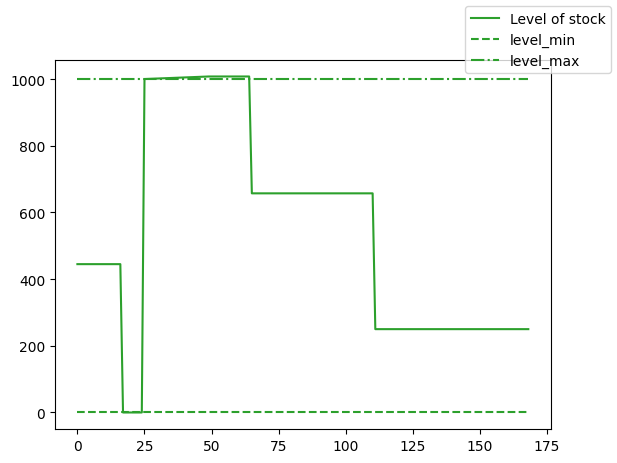

In [174]:
plot_level(1000*0.445,1000,H_optim,inflow-ovf_optim)

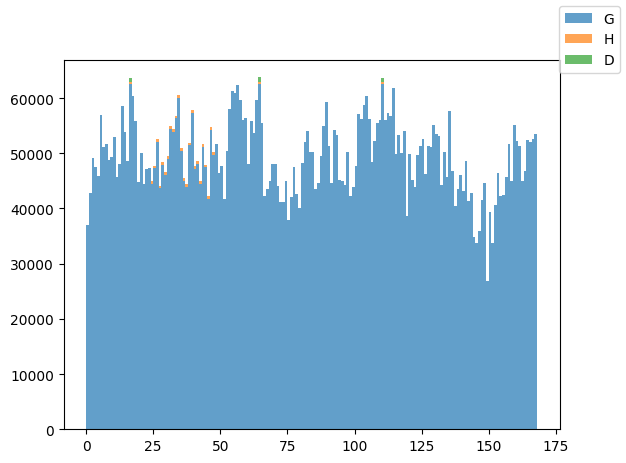

In [175]:
plot_empilement(G_optim,H_optim,D_optim)

# Avec imports

In [34]:
L =  [91, 43, 38, 79, 70, 33, 54, 82, 58, 75]
H =  [78, 10, 30, 57, 31, 5, 19, 13, 28, 45]
D =  [10, 6, 1, 22, 28, 27, 4, 40, 8, 25]
initial_level_i =  145.6
capa_stock_i =  156.0
inflow_i =  [15, 28, 12, 3, 18, 29, 46, 29, 0, 7]
net_position_i =  [-1, -21, 6, 0, 2, -1, 16, -18, -12, -1]

In [35]:
def plot_empilement_avec_imports(G_hors_imports, net_position, H, D):
    imports = np.where(net_position<0,-net_position,np.zeros_like(net_position))
    exports = np.where(net_position>0,-net_position,np.zeros_like(net_position))
    hours_week = range(T + 1)
    fig, ax = plt.subplots()
    res = ax.stackplot(
        hours_week,
        [np.append(exports, 0),np.append(G_hors_imports, 0),np.append(imports, 0), np.append(H, 0), np.append(D, 0)],
        labels=["exports","G (prod locale)", "imports", "H", "D"],
        baseline="zero",
        step="post",
        alpha = 0.7,
        colors = ['tab:orange','tab:orange', 'tab:green', 'tab:blue','tab:red']
    )
    res[0].set_hatch('xx')
    fig.legend()

In [36]:
def plot_ens_dens(net_pos, D,top):
    hours_week = range(T+1)
    fig, ax2 = plt.subplots()
    ax2.step(hours_week,np.append(D,D[-1]), label="ENS",where="post")
    ax2.step(hours_week,np.append(D-net_pos,D[-1]-net_pos[-1]), label="DENS",where="post")
    ax2.set_ylim(top=top)
    fig.legend()


In [37]:
avec_imports =[]
for i in range(N):
    print(i)
    avec_imports.append(new_remix_hydro(empilement_random[i][:,0],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],np.ones(T)*capa_stock[i],np.zeros(T),level_stock[i][0],capa_stock[i], inflow[i],np.zeros(T),np.zeros(T),np.zeros(T),np.zeros(T)))

0
1
2
3
4
5
6
7
8
9


In [38]:
sans_imports =[]
for i in range(N):
    print(i)
    sans_imports.append(new_remix_hydro(empilement_random[i][:,0]+net_position[i],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],np.ones(T)*capa_stock[i],np.zeros(T),level_stock[i][0],capa_stock[i], inflow[i],np.zeros(T),np.zeros(T),np.zeros(T),np.zeros(T)))

0
1
2
3
4
5
6
7
8
9


In [39]:
lisser_ens =[]
for i in range(N):
    print(i)
    lisser_ens.append(new_remix_hydro(empilement_random[i][:,0]-empilement_random[i][:,2],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],np.ones(T)*capa_stock[i],np.zeros(T),level_stock[i][0],capa_stock[i], inflow[i],np.zeros(T),np.zeros(T),np.zeros(T),np.zeros(T)))

0
1
2
3
4
5
6
7
8
9


In [40]:
lisser_dens =[]
for i in range(N):
    print(i)
    lisser_dens.append(new_remix_hydro(empilement_random[i][:,0]-empilement_random[i][:,2]+net_position[i],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1],np.ones(T)*capa_stock[i],np.zeros(T),level_stock[i][0],capa_stock[i], inflow[i],np.zeros(T),np.zeros(T),np.zeros(T),np.zeros(T)))

0
1
2
3
4
5
6
7
8
9


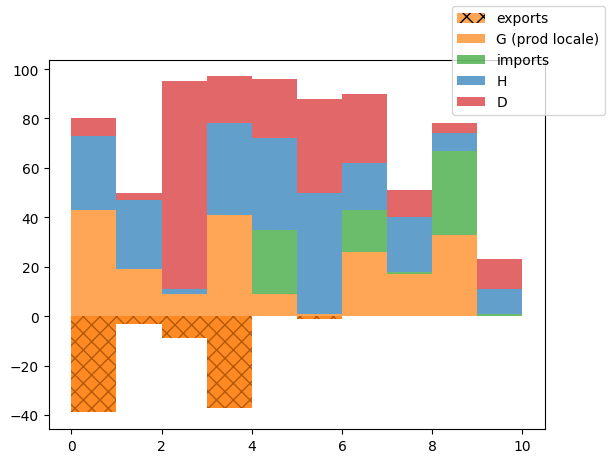

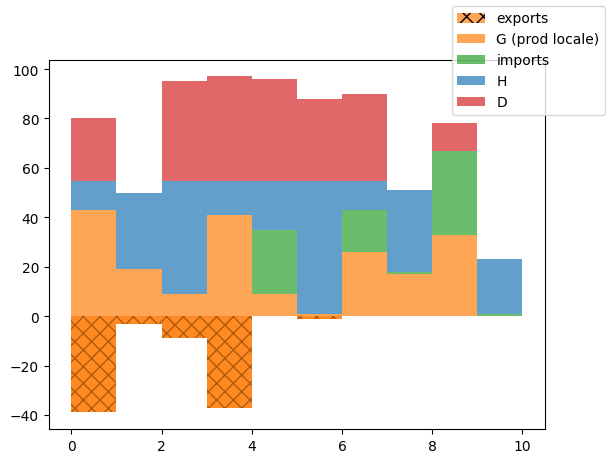

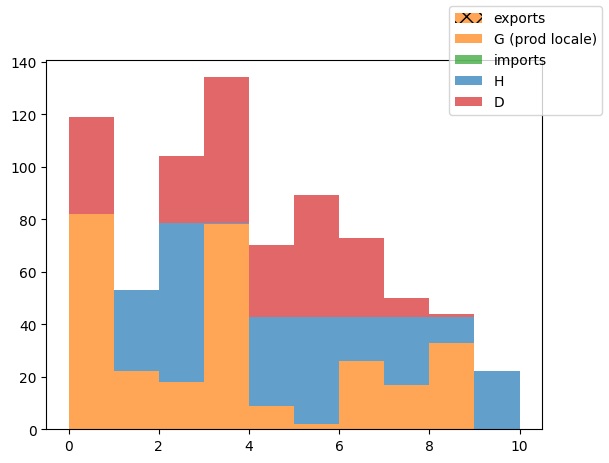

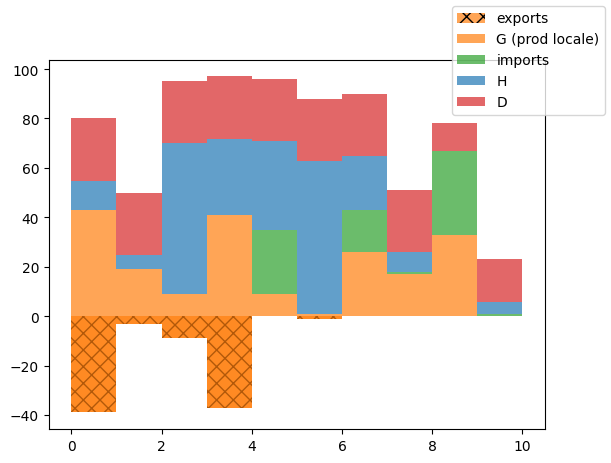

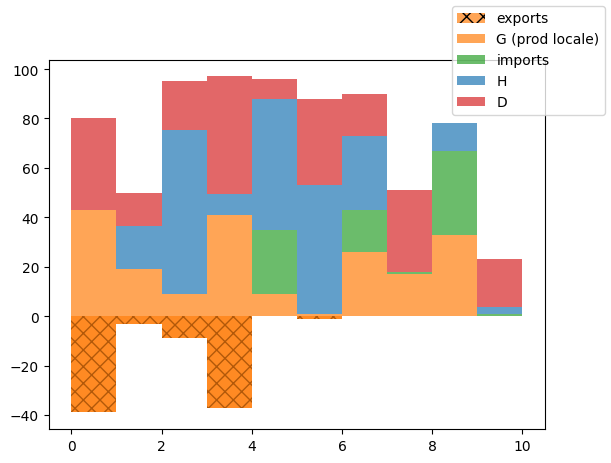

In [41]:
i = 0
plot_empilement_avec_imports(empilement_random[i][:,0]+net_position[i],net_position[i],empilement_random[i][:,1]-empilement_random[i][:,0],empilement_random[i][:,2]-empilement_random[i][:,1])
plot_empilement_avec_imports(empilement_random[i][:,0]+net_position[i],net_position[i],avec_imports[i][0],avec_imports[i][1])
plot_empilement_avec_imports(empilement_random[i][:,0]+net_position[i],np.zeros_like(net_position[i]),sans_imports[i][0],sans_imports[i][1])
plot_empilement_avec_imports(empilement_random[i][:,0]+net_position[i],net_position[i],lisser_ens[i][0],lisser_ens[i][1])
plot_empilement_avec_imports(empilement_random[i][:,0]+net_position[i],net_position[i],lisser_dens[i][0],lisser_dens[i][1])

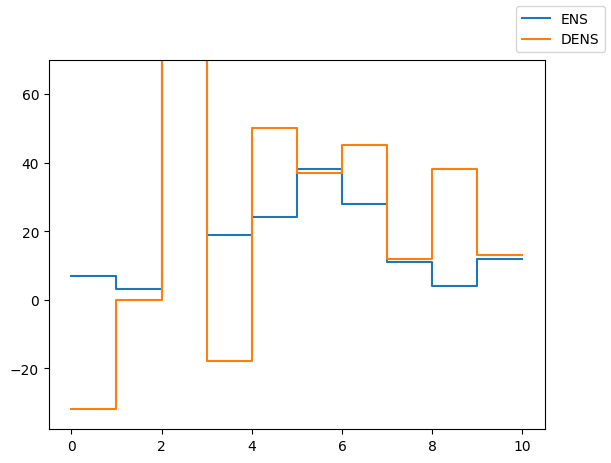

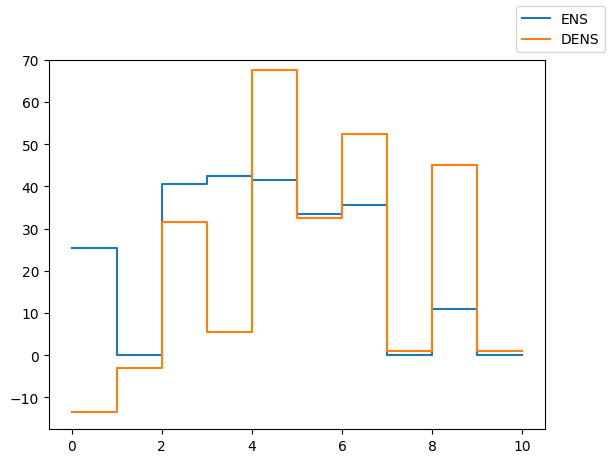

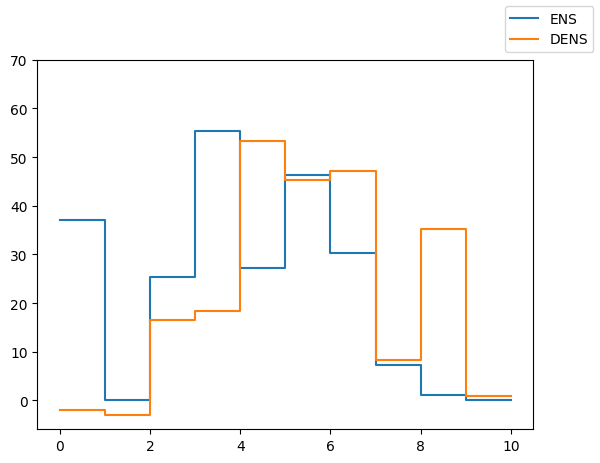

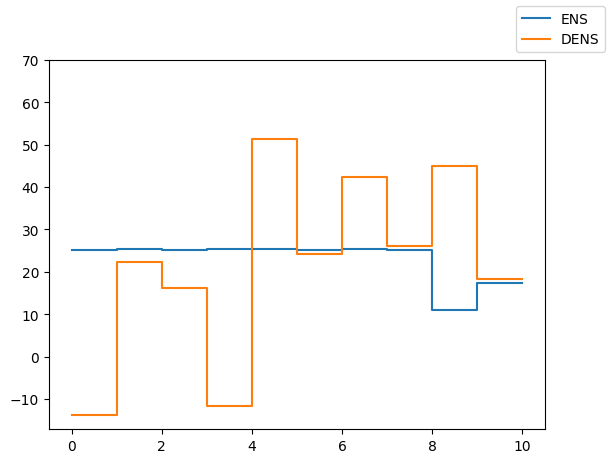

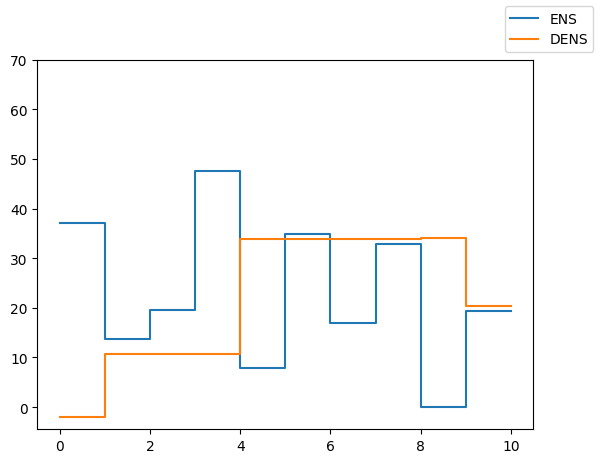

In [44]:
top =70
plot_ens_dens(net_position[i],empilement_random[i][:,2]-empilement_random[i][:,1],top)
plot_ens_dens(net_position[i],avec_imports[i][1],top)
plot_ens_dens(net_position[i],sans_imports[i][1],top)
plot_ens_dens(net_position[i],lisser_ens[i][1],top)
plot_ens_dens(net_position[i],lisser_dens[i][1],top)

# Bug Guillaume

In [45]:
new_H, new_D = new_heuristic_with_p_min_and_capa(np.zeros(10),np.array([10,20,10,20,10,20,10,20,10,20]),np.array([20]*10),np.array([50]*10),np.zeros(10),100,155, np.array([25]*5+[5]*5))

994


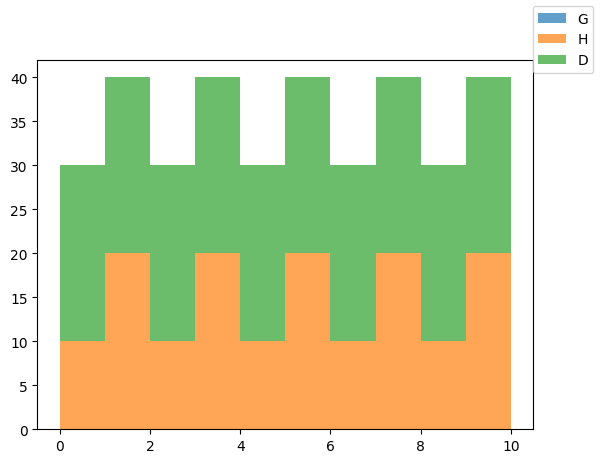

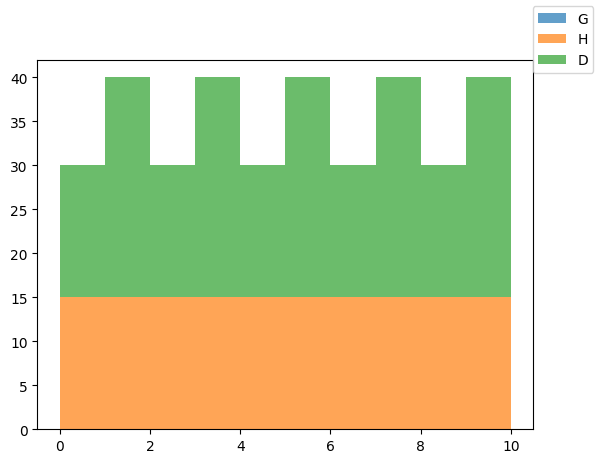

In [46]:
plot_empilement(np.zeros(10),np.array([10,20,10,20,10,20,10,20,10,20]),np.array([20]*10))
plot_empilement(np.zeros(10),new_H,new_D)

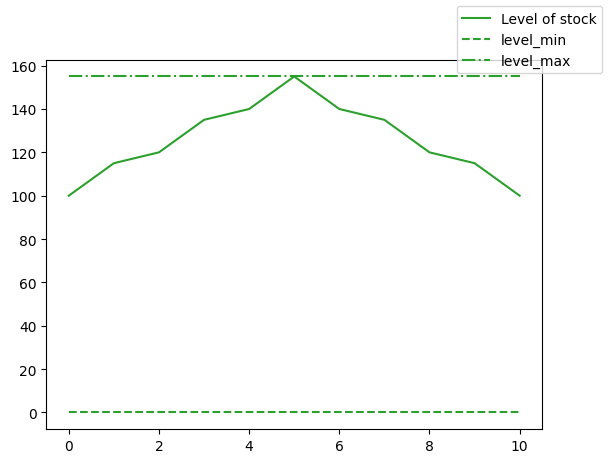

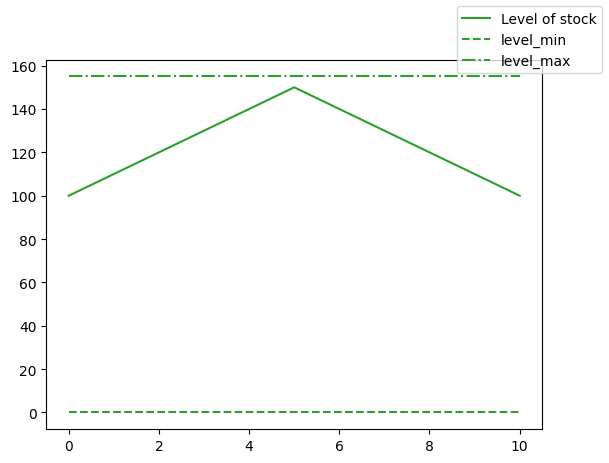

In [47]:
plot_level(100,155,np.array([10,20,10,20,10,20,10,20,10,20]),np.array([25]*5+[5]*5))
plot_level(100,155,new_H,np.array([25]*5+[5]*5))